In [17]:
# Exercici 1
# Crea almenys tres models de regressió diferents per intentar predir el millor possible 
# l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

df = pd.read_csv('archive/DelayedFlights.csv', header=0, sep=',',encoding='utf-8', dayfirst=True)

############################ Característiques de les dades carregades ###############################

print ("Head:\n" + str(dataframe.head()))     # Els camps de cabçelera
print ("shape:\n" + str(dataframe.shape))
print ("Columnes:\n" + str(dataframe.columns))
print ("Correlacio:\n" + str(dataframe.corr()))

############################################### Trantament de les dades ##############################################


# Treiem del conjunt de dades vols que han estat cancel·lats i derivats
df2 = df.loc[df.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]
print ("shape:\n" + str(df2.shape))

# Eliminem del conjunt de dades, variables que no anem a utilitzar
df3 = df2.drop(['Year','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','TailNum','Cancelled','CancellationCode','Diverted'], axis = 1)
print ("shape:\n" + str(df3.shape))

# Terme quadràtic de la variable TaxiOut  i creem noves variables que ens poden ser d'interès
df3['TaxiOut2'] = df3['TaxiOut']**2 

# La companyia WN era quina presentava més endarreriments, creem variable dummy que ens indiqui si la companyia és WN o no (vist en exercicis anteriors)
df3['CarrierWN'] = (df3['UniqueCarrier'] == 'WN').astype(int)

# Creem dummy que ens indiqui el dia de la setmana
dummy = pd.get_dummies(df3['DayOfWeek'])
df4 = pd.concat([df3, dummy], axis = 1)
df_ok = df4.rename(columns={1:'Dll',2:'Dm',3:'Dx',4:'Dj',5:'Dv',6:'Ds',7:'Dg'})

############################ Característiques de les dades carregades del dataframe optimitzat ##########################

# La variable ArrDelay que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents.
X, y = df_ok.loc[:, df_ok.columns != 'ArrDelay'], df_ok.loc[:,'ArrDelay']

print ("Head:\n" + str(df_ok.head()))  # Els camps de cabçelera del nou dataframe
print ("Columnes:\n" + str(df_ok.columns))
print(X.shape, y.shape)

Head:
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN   

shape:
(1928371, 30)
shape:
(1928371, 20)
Head:
   Unnamed: 0  Month  DayofMonth  DayOfWeek UniqueCarrier  ActualElapsedTime  \
0           0      1           3          4            WN              128.0   
1           1      1           3          4            WN              128.0   
2           2      1           3          4            WN               96.0   
3           4      1           3          4            WN               90.0   
4           5      1           3          4            WN              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  ... LateAircraftDelay  \
0           150.0    116.0     -14.0       8.0  ...               NaN   
1           145.0    113.0       2.0      19.0  ...               NaN   
2            90.0     76.0      14.0       8.0  ...               NaN   
3            90.0     77.0      34.0      34.0  ...              32.0   
4           115.0     87.0      11.0      25.0  ...               NaN   

  TaxiOut2  CarrierWN  Dll  Dm  

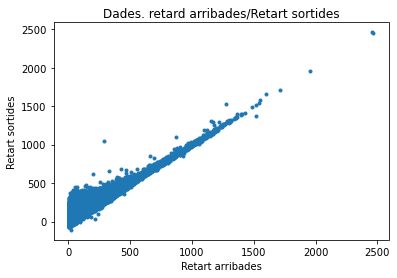

Resum Model 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.905e+07
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:56:31   Log-Likelihood:            -8.2242e+06
No. Observations:             1928371   AIC:                         1.645e+07
Df Residuals:                 1928369   BIC:                         1.645e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5759      0.016    -98.820      0.000      -1.607      -1.545
DepDelay       1.0159      0.000   4364.397      0.000       1.015       1.016
==============================================================================
Omnibus:                  1277609.269   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39393320.164
Skew:                           2.748   Prob(JB):                         0.00
Kurtosis:                      24.449   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Model 1
# Relació lineal entre les variables ArrDelay i DepDelay.

#################################### Gràfic de dades ####################################
plt.scatter(X['DepDelay'],y,marker='.')
plt.xlabel("Retart arribades")
plt.ylabel("Retart sortides")
plt.title("Dades. retard arribades/Retart sortides")
plt.show()


import statsmodels.api as sm # llibreria statsmodels

# Subconjunt amb només DepDelay com variable
X1 = X['DepDelay']

# Ajustem el model
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

print ("Resum Model 1")
model1.summary()


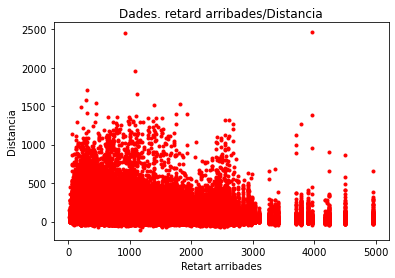

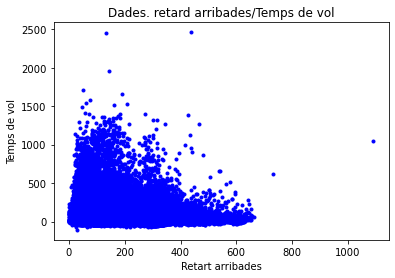

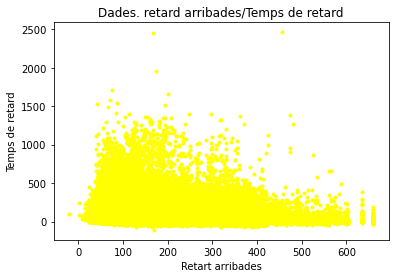

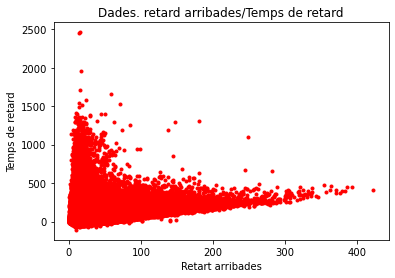

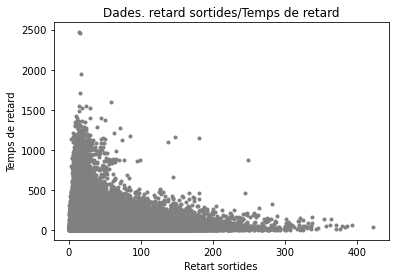

Resum Model 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.957e+07
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:            -7.5764e+06
No. Observations:             1928371   AIC:                         1.515e+07
Df Residuals:                 1928368   BIC:                         1.515e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1870      0.016  -1033.191      0.000     -16.218     -16.156
DepDelay       0.9980      0.000   5980.967      0.000       0.998       0.998
TaxiOut        0.8443      0.001   1359.167      0.000       0.843       0.846
==============================================================================
Omnibus:                   604014.459   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20930363.011
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                      19.049   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Model 2
# Explorem altres variables X que estarien correlacionades amb la variable ArrDelay

#################################### Gràfic de dades ####################################
plt.scatter(X['Distance'],y,marker='.',color = 'Red')
plt.xlabel("Retart arribades")
plt.ylabel("Distancia")
plt.title("Dades. retard arribades/Distancia")
plt.show()

plt.scatter(X['AirTime'],y,marker='.',color = 'Blue')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de vol")
plt.title("Dades. retard arribades/Temps de vol")
plt.show()

plt.scatter(X['CRSElapsedTime'],y,marker='.',color = 'Yellow')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de retard")
plt.title("Dades. retard arribades/Temps de retard")
plt.show()

plt.scatter(X['TaxiOut'],y,marker='.',color = 'Red')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de retard")
plt.title("Dades. retard arribades/Temps de retard")
plt.show()

# Creem el subconjunt de dades amb la nova variable
X2 = X[['DepDelay', 'TaxiOut']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

#################################### Gràfic de dades ####################################

plt.scatter(X['TaxiOut'],X['DepDelay'],marker='.',color = 'Grey')
plt.xlabel("Retart sortides")
plt.ylabel("Temps de retard")
plt.title("Dades. retard sortides/Temps de retard")
plt.show()

print ("Resum Model 2")
model2.summary()


In [35]:
# Model 3
# Afegim el dia de la setmana amb variabbles afegides

X3 = X[['DepDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]

X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()

print ("Resum Model 3")
model3.summary()


Resum Model 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 5.594e+06
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:10:39   Log-Likelihood:            -7.5759e+06
No. Observations:             1928371   AIC:                         1.515e+07
Df Residuals:                 1928363   BIC:                         1.515e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2544      0.021   -770.597      0.000     -16.296     -16.213
DepDelay       0.9980      0.000   5981.227      0.000       0.998       0.998
TaxiOut        0.8439      0.001   1358.326      0.000       0.843       0.845
Dll           -0.2022      0.028     -7.151      0.000      -0.258      -0.147
Dm             0.1733      0.015     11.821      0.000       0.145       0.202
Dm             0.1733      0.015     11.821      0.000       0.145       0.202
Dj             0.2646      0.028      9.343      0.000       0.209       0.320
Dv             0.3786      0.027     13.852      0.000       0.325       0.432
Ds            -0.3706      0.031    -11.971      0.000      -0.431      -0.310
==============================================================================
Omnibus:                   603958.759   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20925161.434
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                      19.047   Cond. No.                     7.76e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# Exercici 2
# Compara’ls en base al MSE i al R2.

# Model 1
X1 = X[['DepDelay']]

lm = linear_model.LinearRegression()
model1_sk = lm.fit(X1,y)
pred1_sk = model1_sk.predict(X1)

print ("Comparacio Model 1")
print ("Score:\n" + str(lm.score(X1,y)))
print ("Mean error:\n" + str(mean_squared_error(y, pred1_sk)))

# Model 2
X2 = X[['DepDelay', 'TaxiOut']]
lm = linear_model.LinearRegression()
model2_sk = lm.fit(X2,y)
pred2_sk = model2_sk.predict(X2)

print ("Comparacio Model 2 (<Model mes optim i senzill>)")
print ("Score:\n" + str(lm.score(X2,y)))
print ("Mean error:\n" + str(mean_squared_error(y, pred2_sk)))

# Model 3
X3 = X[['DepDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]
lm = linear_model.LinearRegression()
model3_sk = lm.fit(X3,y)
pred3_sk = model3_sk.predict(X3)

print ("Comparacio Model 3")
print ("Score:\n" + str(lm.score(X3,y)))
print ("Mean error:\n" + str(mean_squared_error(y, pred3_sk)))


Comparacio Model 1
Score:
0.9080692673713633
Mean error:
296.43084970867784
Comparacio Model 2 (<Model mes optim i senzill>)
Score:
0.9530481447681334
Mean error:
151.3963605403224
Comparacio Model 3
Score:
0.9530688208697574
Mean error:
151.3296904051256


In [50]:
# Exercici 3
# Entrena’ls utilitzant els diferents paràmetres que admeten.

#################################### Dades Train y test entrenament ####################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Model 1
X_train1 = X_train[['DepDelay']]
lm1 = linear_model.LinearRegression()
model_train1_sk = lm1.fit(X_train1,y_train)
print ("Entrenament Model 1")
print ("Score:\n" + str(lm1.score(X_train1,y_train)))

# Model 2
X_train2 = X_train[['DepDelay', 'TaxiOut']]
lm2 = linear_model.LinearRegression()
model_train2_sk = lm2.fit(X_train2,y_train)
print ("Entrenament Model 2")
print ("Score:\n" + str(lm2.score(X_train2,y_train)))

# Model 3
X_train3 = X_train[['DepDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]
lm3 = linear_model.LinearRegression()
model_train3_sk = lm3.fit(X_train3,y_train)
print ("Entrenament Model 3")
print ("Score:\n" + str(lm3.score(X_train3,y_train)))


(1542696, 28) (385675, 28) (1542696,) (385675,)
Entrenament Model 1
Score:
0.9079224159725534
Entrenament Model 2
Score:
0.9529988243845618
Entrenament Model 3
Score:
0.9530188800457705


In [62]:
# Exercici 4
# Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades

# Model 1
X_test1 = X_test[['DepDelay']]
y_pred1_sk = model_train1_sk.predict(X_test1)

print ("Rendiment Model 1")
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1_sk)) 
print(' Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1_sk)) 
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1_sk)))

# Model 2
X_test2 = X_test[['DepDelay', 'TaxiOut']]
y_pred2_sk = model_train2_sk.predict(X_test2)
print ("Rendiment Model 2")
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2_sk)) 
print(' Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2_sk)) 
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_sk)))

#Model 3
X_test3 = X_test[['DepDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]
y_pred3_sk = model_train3_sk.predict(X_test3)
print ("Rendiment Model 3")
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3_sk)) 
print(' Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3_sk)) 
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3_sk)))

Rendiment Model 1
 Mean Absolute Error: 11.274707873030204
 Mean Squared Error: 297.01036277641225
 Root Mean Squared Error: 17.233988591629398
Rendiment Model 2
 Mean Absolute Error: 8.731456750502876
 Mean Squared Error: 152.0231304966978
 Root Mean Squared Error: 12.329766035764742
Rendiment Model 3
 Mean Absolute Error: 8.72792697334865
 Mean Squared Error: 151.94857431809052
 Root Mean Squared Error: 12.326742242705107


In [65]:
# Exercici 5
# Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

X_train5 = X_train[['DepDelay','TaxiOut','TaxiOut2']]
X_train5 = sm.add_constant(X_train5)
model5 = sm.OLS(y_train, X_train5).fit()

print ("Resum Model")
print(model5.summary())

X_train5b = X_train[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
X_train5b = sm.add_constant(X_train5b)
model5b = sm.OLS(y_train, X_train5b).fit()

print ("Resum Model")
print(model5b.summary())

# Afegint aquestes variables hem arribat a un model on totes les variables són significatives i el coeficient de determinació és del 95.5%

X_train5b = X_train[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
X_test5b = X_test[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
lm5b = linear_model.LinearRegression()
model_train5b_sk = lm5b.fit(X_train5b,y_train)

y_pred5b_sk = model_train5b_sk.predict(X_test5b)
print ("Rendiment Model")
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5b_sk)) 
print(' Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5b_sk)) 
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5b_sk)))


Resum Model
                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.055e+07
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:42:06   Log-Likelihood:            -6.0519e+06
No. Observations:             1542696   AIC:                         1.210e+07
Df Residuals:                 1542692   BIC:                         1.210e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4183      0.022   -654.

In [68]:
# Exercici 6
# No utilitzis la variable DepDelay a l’hora de fer prediccions

dfNUM = df3.loc[:,['ArrDelay','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut']]
corrMatrix = dfNUM.corr()
print (corrMatrix)
  
# Correlacio DepDelay amb ArrDelay.

X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]
X_train6 = sm.add_constant(X_train6)
model6 = sm.OLS(y_train, X_train6).fit()

print ("Resum Model")
print(model6.summary())

# El coeficient de determinació
X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]
X_test6 = X_test[['TaxiIn','TaxiOut','Distance','CarrierWN']]
lm6 = linear_model.LinearRegression()
model_train6_sk = lm6.fit(X_train6,y_train)

y_pred6_sk = model_train6_sk.predict(X_test6)
print ("Rendiment Model")
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6_sk)) 
print(' Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6_sk)) 
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6_sk)))


                   ArrDelay  ActualElapsedTime  CRSElapsedTime   AirTime  \
ArrDelay           1.000000           0.068130       -0.015676 -0.000189   
ActualElapsedTime  0.068130           1.000000        0.971122  0.976660   
CRSElapsedTime    -0.015676           0.971122        1.000000  0.986086   
AirTime           -0.000189           0.976660        0.986086  1.000000   
DepDelay           0.952927           0.018492        0.006835 -0.002753   
Distance          -0.029853           0.952980        0.981967  0.980294   
TaxiIn             0.156277           0.166348        0.099693  0.083926   
TaxiOut            0.286484           0.289568        0.123454  0.090398   

                   DepDelay  Distance    TaxiIn   TaxiOut  
ArrDelay           0.952927 -0.029853  0.156277  0.286484  
ActualElapsedTime  0.018492  0.952980  0.166348  0.289568  
CRSElapsedTime     0.006835  0.981967  0.099693  0.123454  
AirTime           -0.002753  0.980294  0.083926  0.090398  
DepDelay       